<a href="https://colab.research.google.com/github/hugoalexg/Python-for-Data-Science-and-Machine-Learning-Bootcamp/blob/main/20_Natural_Language_Processing_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Natural Language Processing Project**

Welcome to the NLP Project for this section of the course. In this NLP project you will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. This will be a simpler procedure than the lecture, since we will utilize the pipeline methods for more complex tasks.

Each observation in this dataset is a review of a particular business by a particular user.
The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.
The "cool" column is the number of "cool" votes this review received from other Yelp users. 
All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.
The "useful" and "funny" columns are similar to the "cool" column.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()

In [ ]:
import nltk

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


Read the yelp.csv file and set it as a dataframe called yelp.

In [ ]:
yelp = pd.read_csv("/content/drive/My Drive/Python for Data Science and Machine Learning Bootcamp/Files/yelp.csv")
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [ ]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


Create a new column called "text length" which is the number of words in the text column.

In [ ]:
#yelp['text length'] = yelp['text'].apply(lambda tx: len(tx.split()))
yelp['text length'] = yelp['text'].apply(len)

In [ ]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


Let's explore the data

Use FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings. Reference the seaborn documentation for hints on this

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


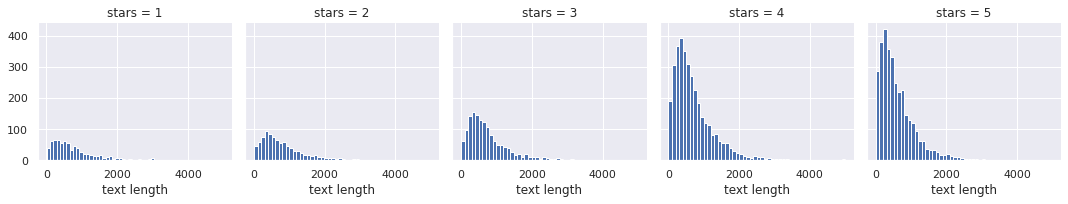

In [ ]:
g = sns.FacetGrid(yelp, col="stars")
g.map(sns.distplot,"text length", kde=False, bins=50, hist_kws=dict(alpha=1))
plt.show()


Create a boxplot of text length for each star category.

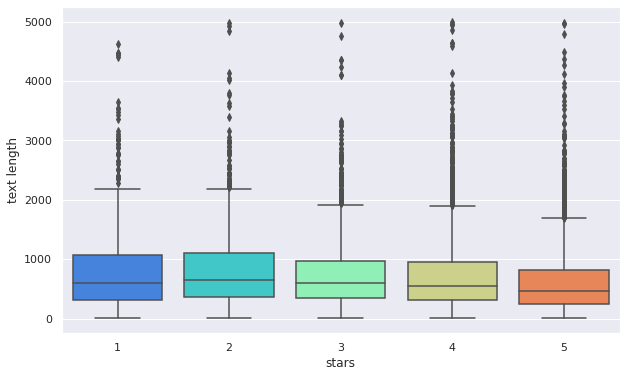

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="stars", y="text length", data=yelp, palette='rainbow')
plt.show()

Create a countplot of the number of occurrences for each type of star rating.

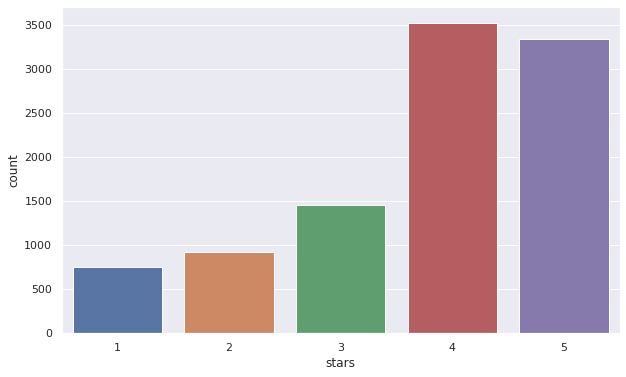

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='stars', data=yelp)
plt.show()

** Use groupby to get the mean values of the numerical columns, you should be able to create this dataframe with the operation:**

In [ ]:
ybs = yelp.groupby('stars').mean()[['cool','useful','funny','text length']]
ybs

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101



Use the corr() method on that groupby dataframe to produce this dataframe:

In [ ]:
ybs.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000



Then use seaborn to create a heatmap based off that .corr() dataframe:

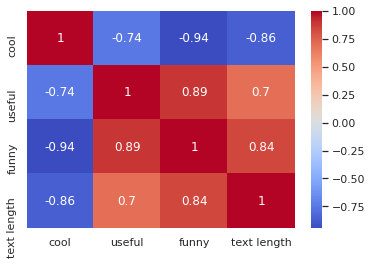

In [ ]:
sns.heatmap(ybs.corr(), cmap='coolwarm', annot=True)

**NLP Classification Task**


Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.

In [ ]:
yelp_class = yelp[(yelp['stars'] == 1)|(yelp['stars'] == 5)]

In [ ]:
yelp_class.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565



Create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (Your features and target/labels)

In [ ]:
X = yelp_class['text']
y = yelp_class['stars']


Import CountVectorizer and create a CountVectorizer object.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

Use the fit_transform method on the CountVectorizer object and pass in X (the 'text' column). Save this result by overwriting X.

In [ ]:
X = cv.fit_transform(X)

In [ ]:
#calculando 'sparsity'
sparsity = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


Train Test Split


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)


Training a Model


Import MultinomialNB and create an instance of the estimator and call is nb

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_test, y_test)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


Predictions and Evaluations


In [ ]:
pred = nb.predict(X_test)

Create a confusion matrix and classification report using these predictions and y_test

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           1       0.72      1.00      0.84       165
           5       1.00      0.94      0.97      1061

    accuracy                           0.95      1226
   macro avg       0.86      0.97      0.90      1226
weighted avg       0.96      0.95      0.95      1226



In [ ]:
print(confusion_matrix(pred,y_test))

[[165   0]
 [ 63 998]]


**Using Text Processing**


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

Now create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()

In [ ]:
#testando com função "text_process" do exercicio anterior
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

def text_process(mess):   
    nopunc = [char for char in mess if char not in string.punctuation] # Check characters to see if they are in punctuation   
    nopunc = ''.join(nopunc) # Join the characters again to form the string. 
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')] # Now just remove any stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [ ]:
#O algoritmo SVC foi o que apresentou os melhores resultados combinado com o TF-IDF
#pipeline = Pipeline([
#    ('bow', CountVectorizer()),  # strings to token integer counts
#    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
#    ('classifier', SVC()),  # train on TF-IDF vectors w/ Naive Bayes classifier
#])

Redo the train test split on the yelp_class object.

In [ ]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)


Now fit the pipeline to the training data

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f37ea89c510>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
pred = pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           1       0.63      0.93      0.75       154
           5       0.99      0.92      0.95      1072

    accuracy                           0.92      1226
   macro avg       0.81      0.92      0.85      1226
weighted avg       0.94      0.92      0.93      1226



In [ ]:
print(confusion_matrix(pred,y_test))

[[143  11]
 [ 85 987]]
